In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
from tqdm import trange
from operator import itemgetter
import numpy as np
from pprint import pprint

import matplotlib.pyplot as plt
from matplotlib import rc
gridc = (1., 1., 1)
plt.rcParams['grid.color'] = gridc
plt.rcParams["axes.edgecolor"] = (0.898, 0.925, 0.965, 1)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

from funcs import DataBase

In [31]:
db = DataBase('../assets/iclr2022.db')
db.initialize(create=False)

### key words

In [ ]:
# all submissions 
_cmd = "SELECT keywords FROM submissions;"
db.cursor.execute(_cmd)
data = db.cursor.fetchall()
keywords = {}
for i in trange(len(data)):
    _kw = data[i][0].split(', ')
    _kw = [_k.lower().strip() for _k in _kw]
    for _k in _kw:
        if _k in keywords.keys():
            keywords[_k] += 1
        else:
            keywords[_k] = 1
# sort values
keywords = {k: v for k, v in sorted(keywords.items(), key=lambda item: item[1])[::-1]}

### statistics bar

In [98]:
# all decisions
_cmd = "SELECT rating_3_avg FROM submissions;"
db.cursor.execute(_cmd)
data = db.cursor.fetchall()
rating_avgs = np.array(data)
print("> Total submissions (including the withdraw): {}".format(len(data)))
print(f"    Average ratings: {rating_avgs.mean():.2f}")
print(f"    Max ratings: {rating_avgs.max():.2f}")
print(f"    Min ratings: {rating_avgs.min():.2f}")

# oral
_cmd = "SELECT rating_3_avg FROM submissions WHERE decision LIKE '%Oral%';"
db.cursor.execute(_cmd)
data = db.cursor.fetchall()
oral_avgs = np.array(data)
print("> Oral submissions: {}".format(oral_avgs.shape[0]))
print(f"    Average ratings: {oral_avgs.mean():.2f}")
print(f"    Max ratings: {oral_avgs.max():.2f}")
print(f"    Min ratings: {oral_avgs.min():.2f}")

# spotlight
_cmd = "SELECT rating_3_avg FROM submissions WHERE decision LIKE '%Spotlight%';"
db.cursor.execute(_cmd)
data = db.cursor.fetchall()
spotlight_avgs = np.array(data)
print("> Soitlight submissions: {}".format(spotlight_avgs.shape[0]))
print(f"    Average ratings: {spotlight_avgs.mean():.2f}")
print(f"    Max ratings: {spotlight_avgs.max():.2f}")
print(f"    Min ratings: {spotlight_avgs.min():.2f}")

# poster
_cmd = "SELECT rating_3_avg FROM submissions WHERE decision LIKE '%Poster%';"
db.cursor.execute(_cmd)
data = db.cursor.fetchall()
poster_avgs = np.array(data)
print("> Poster submissions: {}".format(poster_avgs.shape[0]))
print(f"    Average ratings: {poster_avgs.mean():.2f}")
print(f"    Max ratings: {poster_avgs.max():.2f}")
print(f"    Min ratings: {poster_avgs.min():.2f}")

# reject
_cmd = "SELECT rating_3_avg FROM submissions WHERE decision LIKE '%Reject%';"
db.cursor.execute(_cmd)
data = db.cursor.fetchall()
reject_avgs = np.array(data)
print("> Reject submissions: {}".format(reject_avgs.shape[0]))
print(f"    Average ratings: {reject_avgs.mean():.2f}")
print(f"    Max ratings: {reject_avgs.max():.2f}")
print(f"    Min ratings: {reject_avgs.min():.2f}")

# all
_cmd = "SELECT rating_3_avg FROM submissions WHERE withdraw == 0;"
db.cursor.execute(_cmd)
data = db.cursor.fetchall()
acpt_avgs = np.array(data)
print("> Accepted submissions: {}".format(acpt_avgs.shape[0]))
print(f"    Average ratings: {acpt_avgs.mean():.2f}")
print(f"    Max ratings: {acpt_avgs.max():.2f}")
print(f"    Min ratings: {acpt_avgs.min():.2f}")

> Total submissions (including the withdraw): 3328
    Average ratings: 5.22
    Max ratings: 9.00
    Min ratings: 1.00
> Oral submissions: 54
    Average ratings: 7.81
    Max ratings: 9.00
    Min ratings: 5.00
> Soitlight submissions: 176
    Average ratings: 7.35
    Max ratings: 8.67
    Min ratings: 5.67
> Poster submissions: 865
    Average ratings: 6.41
    Max ratings: 8.00
    Min ratings: 4.50
> Reject submissions: 1580
    Average ratings: 4.71
    Max ratings: 7.50
    Min ratings: 1.00
> Accepted submissions: 2675
    Average ratings: 5.49
    Max ratings: 9.00
    Min ratings: 1.00


In [96]:
_cmd = "SELECT rating_3_avg FROM submissions WHERE withdraw == 1;"
db.cursor.execute(_cmd)
data = db.cursor.fetchall()
len(data)

653

2675
Rejct: 1580
Poster: 865
Spotlight: 176
Oral: 54


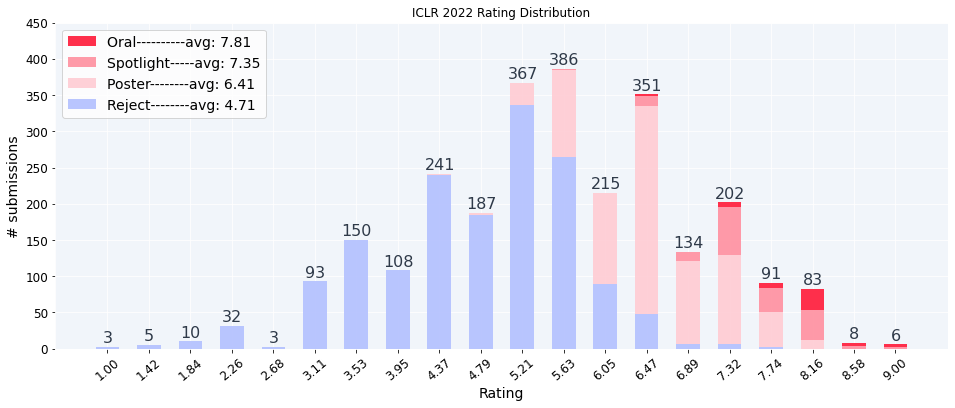

In [95]:
_cmd = "SELECT rating_3_avg FROM submissions WHERE withdraw == 0;"
db.cursor.execute(_cmd)
data = db.cursor.fetchall()
rating_avgs = np.array(data)
_min, _max = rating_avgs.min(), rating_avgs.max()

width = 0.24
fig = plt.figure(figsize=[16, 6], frameon=False)

ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor((0.898, 0.925, 0.965, 0.5))
ax.spines['left'].set_color('w')
ax.spines['bottom'].set_color('w')
ax.spines['right'].set_color('w')
ax.spines['top'].set_color('w')

# all submissions
hist, bin_edges = np.histogram(rating_avgs, bins=20, range=(_min, _max))
# ax.bar(np.linspace(_min, _max, len(hist)), hist, width=width, alpha=0.95, 
#        color='#789BFF', capsize=4)
print(sum(hist))
for i, v in zip(np.linspace(_min, _max, len(hist)), hist):
    ax.text(i - 0.05 * len(str(v)), v + 6.0, str(v), color='#2f3a49', fontsize=16)

# reject
hist_reject, _ = np.histogram(reject_avgs, bins=20, range=(_min, _max))
print(f"Rejct: {sum(hist_reject)}")
ax.bar(np.linspace(_min, _max, len(hist)), hist_reject, width=width, alpha=0.95, 
       color='#B6C3FF', capsize=4, label=f'{"Reject":-<14}avg: {reject_avgs.mean():.2f}')

# poster
hist_poster, _ = np.histogram(poster_avgs, bins=20, range=(_min, _max))
print(f"Poster: {sum(hist_poster)}")
ax.bar(np.linspace(_min, _max, len(hist)), hist_poster, bottom=hist_reject, width=width, alpha=0.95, 
       color='#ffced6', capsize=4, label=f'{"Poster":-<14}avg: {poster_avgs.mean():.2f}')

# spotlight
hist_spotlight, _ = np.histogram(spotlight_avgs, bins=20, range=(_min, _max))
print(f"Spotlight: {sum(hist_spotlight)}")
ax.bar(np.linspace(_min, _max, len(hist)), hist_spotlight, bottom=hist_poster + hist_reject, 
       width=width, alpha=0.95, 
       color='#FF95A4', capsize=4, label=f'{"Spotlight":-<14}avg: {spotlight_avgs.mean():.2f}')

# oral
hist_oral, _ = np.histogram(oral_avgs, bins=20, range=(_min, _max))
print(f"Oral: {sum(hist_oral)}")
ax.bar(np.linspace(_min, _max, len(hist)), hist_oral, bottom=hist_poster + hist_reject + hist_spotlight, 
       width=width, alpha=0.95, 
       color='#FF2542', capsize=4, label=f'{"Oral":-<14}avg: {oral_avgs.mean():.2f}')

plt.ylim(0, 450)
plt.xticks(ticks=np.linspace(_min, _max, len(hist)), 
           rotation=40, 
           labels=[f"{d:.2f}" for d in np.linspace(_min, _max, len(hist))])
ax.set_ylabel(r"# submissions", fontsize=14)
ax.set_xlabel("Rating", fontsize=14)
ax.set_axisbelow(True)
ax.grid()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc=2, fontsize=14)
plt.title('ICLR 2022 Rating Distribution')
plt.savefig('../images/stats_bar_0130.png')

### write all submissions

In [32]:
_cmd = "SELECT id, url, title, rating_0_avg, rating_3_avg, ratings_0, ratings_3, rating_3_cnt, decision FROM submissions WHERE withdraw == 0 ORDER BY rating_3_avg DESC;"
db.cursor.execute(_cmd)
data = db.cursor.fetchall()

for i, d in enumerate(data[1]):
    print(f"{i}--------{d}")

0--------757
1--------https://openreview.net/forum?id=0RDcd5Axok
2--------Towards a Unified View of Parameter-Efficient Transfer Learning
3--------8.0
4--------8.666666666666666
5--------10.0, 8.0, 6.0
6--------10, 8, 8
7--------3
8--------Accept (Spotlight)


In [38]:
_cmd = "SELECT id, url, title, rating_0_avg, rating_3_avg, ratings_0, ratings_3, rating_3_cnt, decision FROM submissions WHERE withdraw == 0 AND decision!= 'Reject' ORDER BY rating_3_avg DESC;"
db.cursor.execute(_cmd)
data = db.cursor.fetchall()

# read template 
with open('../iclr2022_submissions_template.html', 'r') as f:
    html_temp = f.readlines()
# find insert index
idx = html_temp.index('    <!-- start here -->\n') + 1

# decision map
decision_map = {
    'oral': 2,
    'spotlight': 1,
    'poster': 0,
}

# write data
for i in trange(len(data)):
    _data = data[i]
    decision = _data[8].split("(")[-1].split(')')[0]
    
    _str = f"<tr><td>{i + 1}</td><td class='td-left'><a href='{_data[1]}'> {_data[2]}</a></td>" \
           f"<td class='r1'>{_data[3]:.2f}</td><td>{_data[4]:.2f}</td>" \
           f"<td data-sort='{(5.0 + _data[4] - _data[3]):.2f}'>{(_data[4]-_data[3]):.2f}</td>" \
           f"<td data-sort='{_data[7]}'>" \
           f"<table class='sub-table'>" \
           f"<tr><td class='r1'>{', '.join([str(int(float(_d))) for _d in _data[5].split(', ')][::-1])}</td>" \
           f"</tr><tr><td class='r2'>{', '.join([str(int(float(_d))) for _d in _data[6].split(', ')][::-1])}</td></tr>" \
           f"</table></td><td data-sort='{decision_map[decision.lower()]}' class='{decision.lower()}'>{decision}</td>" \
           f"</tr>\n"
    html_temp.insert(idx + i, _str)

with open('../iclr2022_submissions.html' ,'w') as f:
    f.write("".join(html_temp))

100%|███████████████████████████████████████████████████████████████████████████| 1095/1095 [00:00<00:00, 150656.48it/s]


In [27]:
db.close()